In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [82]:
# Load train and test data
train_data = pd.read_csv("Consumer_Complaints_train.csv")
train_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [83]:
test_data = pd.read_csv("Consumer_Complaints_test.csv")
test_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [84]:
# Check data types
print(train_data.dtypes)
print(test_data.dtypes)


Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company    

In [85]:
# Missing value analysis and dropping columns
threshold = 0.25
train_data.dropna(thresh=len(train_data) * threshold, axis=1, inplace=True)
test_data.dropna(thresh=len(test_data) * threshold, axis=1, inplace=True)

In [86]:
# Convert 'Date received' column to datetime
train_data['Date received'] = pd.to_datetime(train_data['Date received'])


In [87]:
# Extract Day, Month, and Year
train_data['Year_received'] = train_data['Date received'].dt.year
train_data['Month_received'] = train_data['Date received'].dt.month
train_data['Day_received'] = train_data['Date received'].dt.day

In [88]:
# Convert 'Date Received' and 'Date Sent to Company' columns to datetime
train_data['Date received'] = pd.to_datetime(train_data['Date received'])
train_data['Date sent to company'] = pd.to_datetime(train_data['Date sent to company'])

# Calculate Number of Days the Complaint was with the Company
train_data['Days_held'] = (train_data['Date sent to company'] - train_data['Date received']).dt.days

In [89]:
# Calculate Number of Days the Complaint was with the Company
train_data['Days_held'] = (train_data['Date sent to company'] - train_data['Date received']).dt.days

In [90]:
# Drop unnecessary fields
train_data = train_data.drop(columns=['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'])

In [91]:
# Impute Null value in “State” by Mode
train_data['State'].fillna(train_data['State'].mode()[0], inplace=True)

In [92]:
# Create a new field 'Week_Received' where we calculate the week based on the day of receiving
train_data['Week_received'] = train_data['Day_received'] // 7 + 1

In [93]:
# Store data of disputed people into the “disputed_cons” variable for future tasks
disputed_cons = train_data[train_data['Consumer disputed?'] == 'Yes']

<AxesSubplot:xlabel='Consumer disputed?', ylabel='count'>

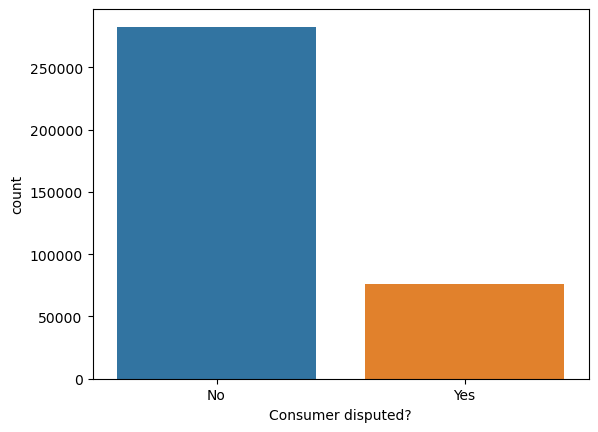

In [94]:
# Plot bar graph of the total number of disputes of consumers with the help of seaborn
sns.countplot(x='Consumer disputed?', data=train_data)

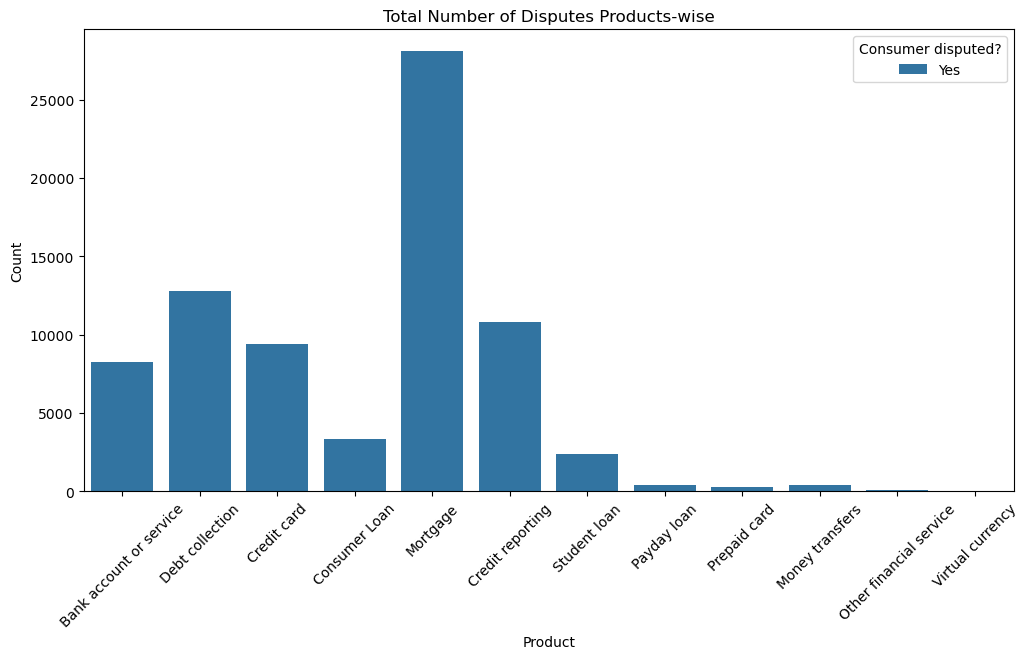

In [95]:
# Plot bar graph of the total number of disputes products-wise
plt.figure(figsize=(12, 6))
sns.countplot(data=disputed_cons, x='Product', hue='Consumer disputed?')
plt.title('Total Number of Disputes Products-wise')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


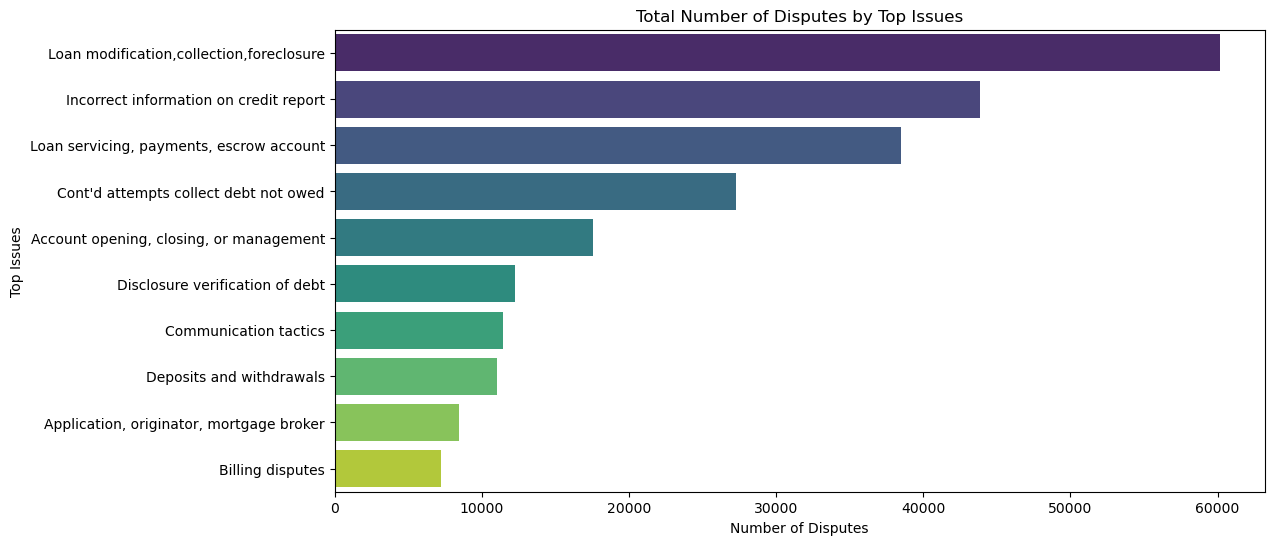

In [96]:
# Bar graph of the total number of disputes by top issues with highest disputes
top_issues = train_data['Issue'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_issues.values, y=top_issues.index, palette='viridis')
plt.xlabel('Number of Disputes')
plt.ylabel('Top Issues')
plt.title('Total Number of Disputes by Top Issues')
plt.show()

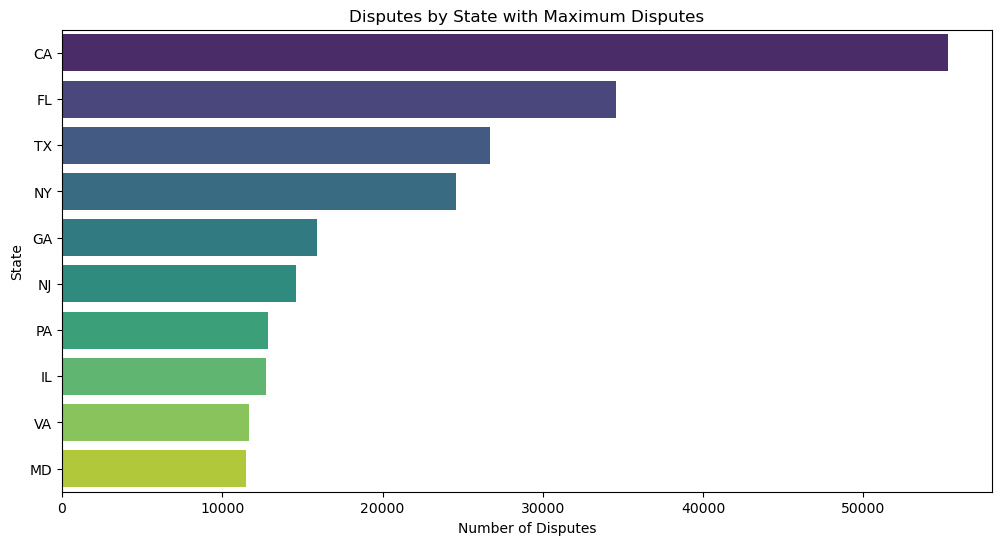

In [97]:
# Plot bar graph of the total number of disputes by State with Maximum Disputes
state_disputes = train_data['State'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=state_disputes.values, y=state_disputes.index, palette='viridis')
plt.xlabel('Number of Disputes')
plt.ylabel('State')
plt.title('Disputes by State with Maximum Disputes')
plt.show()

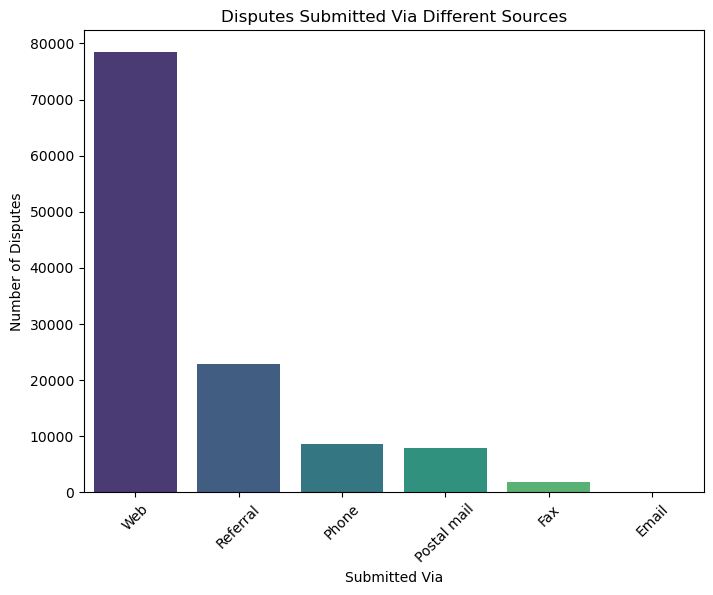

In [98]:
# Plot bar graph of the total number of disputes Submitted Via different sources
submitted_via_disputes = test_data['Submitted via'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=submitted_via_disputes.index, y=submitted_via_disputes.values, palette='viridis')
plt.xlabel('Submitted Via')
plt.ylabel('Number of Disputes')
plt.title('Disputes Submitted Via Different Sources')
plt.xticks(rotation=45)
plt.show()

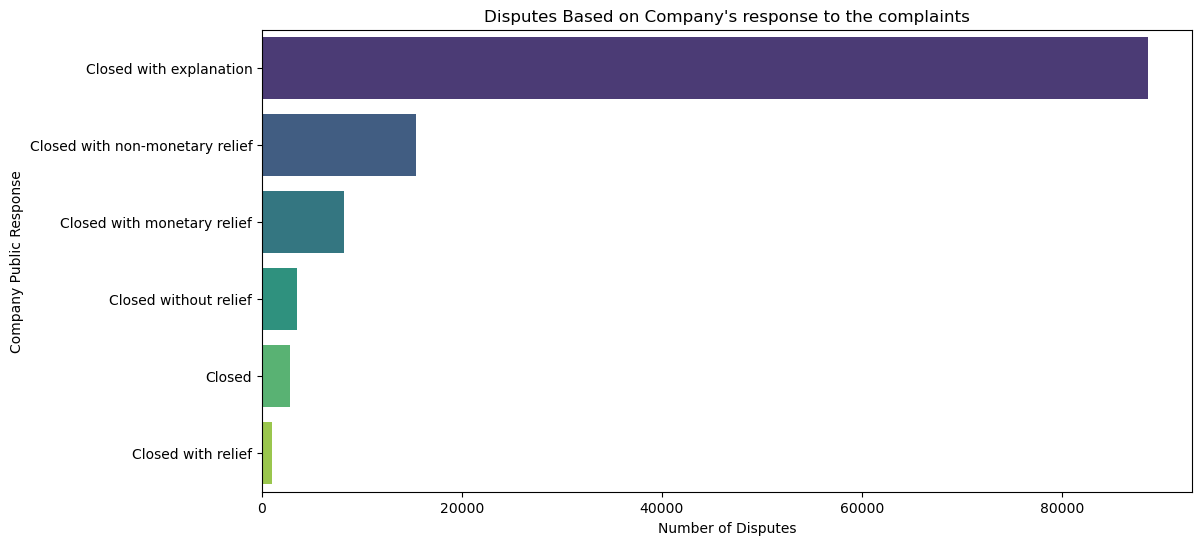

In [99]:
# Plot bar graph of the total number of disputes where the Company's Response to the Complaints
response_disputes = test_data['Company response to consumer'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=response_disputes.values, y=response_disputes.index, palette='viridis')
plt.xlabel('Number of Disputes')
plt.ylabel('Company Public Response')
plt.title("Disputes Based on Company's response to the complaints")
plt.show()


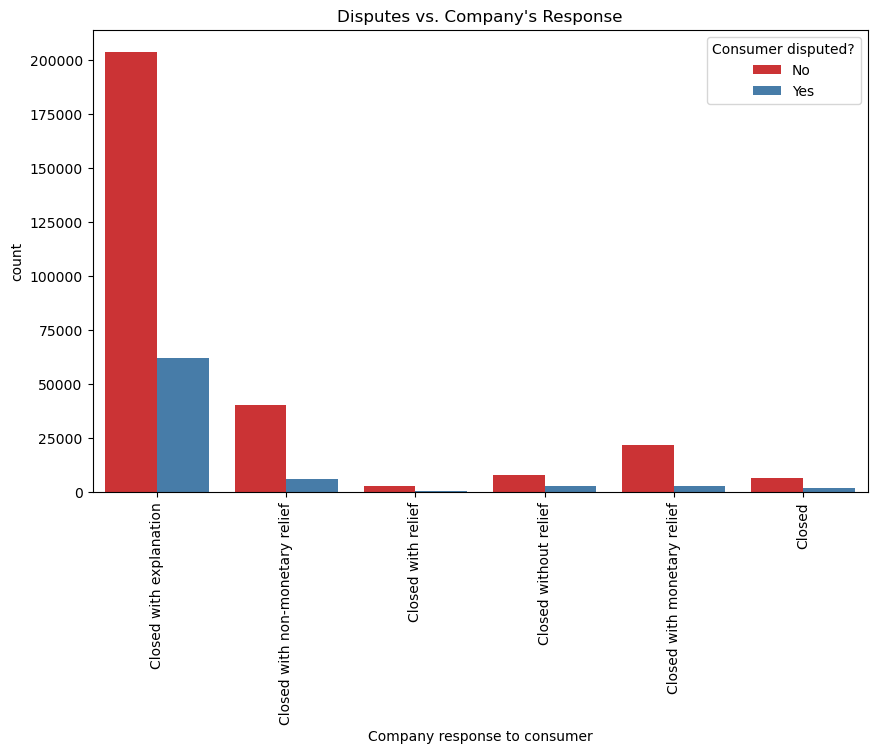

In [100]:
# Bar graph of the total number of disputes where the Company's Response Leads to Disputes:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Company response to consumer', hue='Consumer disputed?', palette='Set1')
plt.title("Disputes vs. Company's Response")
plt.xticks(rotation=90)
plt.show()


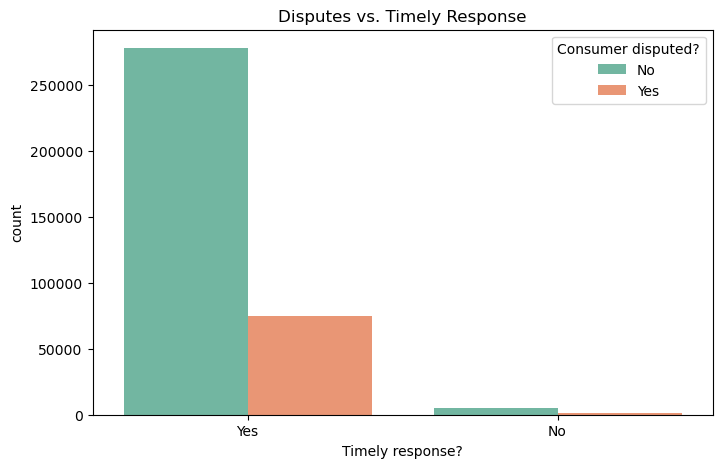

In [101]:
# Bar graph of the total number of disputes where there are Disputes Instead of Timely Response:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Timely response?', hue='Consumer disputed?', palette='Set2')
plt.title("Disputes vs. Timely Response")
plt.show()


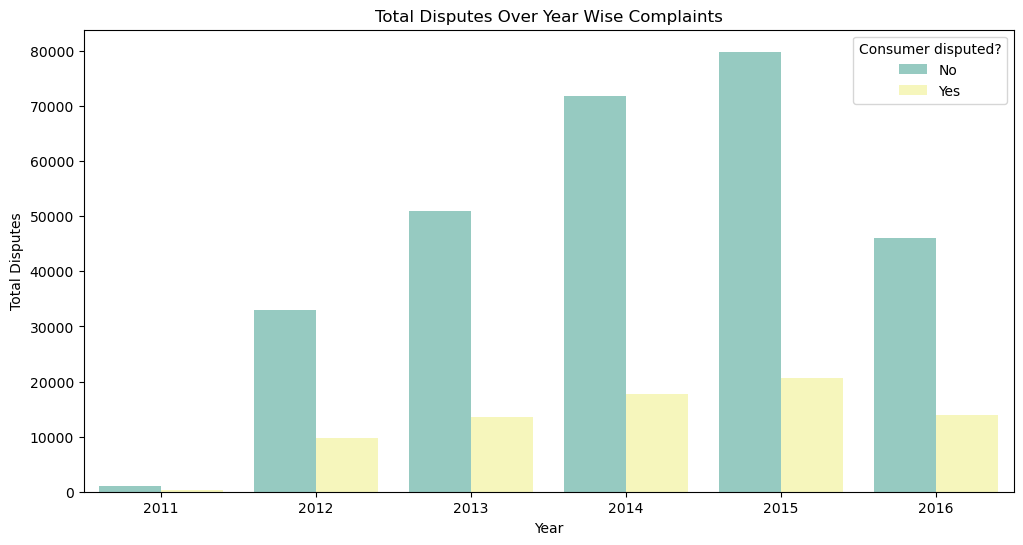

In [104]:
# Extract year from Date received
test_data['Year'] = pd.to_datetime(test_data['Date received']).dt.year
#Bar graphs of total disputes over Year Wise Complaints and Year Wise Disputes:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Year_received', hue='Consumer disputed?', palette='Set3')
plt.title("Total Disputes Over Year Wise Complaints")
plt.xlabel("Year")
plt.ylabel("Total Disputes")
plt.show()


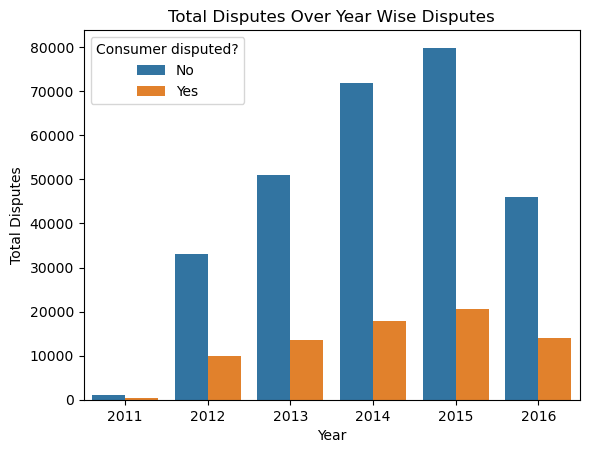

In [103]:
# Plot bar graph of total disputes over Year Wise Disputes
# Extract year from Date received
test_data['Year'] = pd.to_datetime(test_data['Date received']).dt.year
sns.countplot(data=train_data, x='Year_received', hue='Consumer disputed?')
plt.title("Total Disputes Over Year Wise Disputes")
plt.xlabel("Year")
plt.ylabel("Total Disputes")
plt.show()

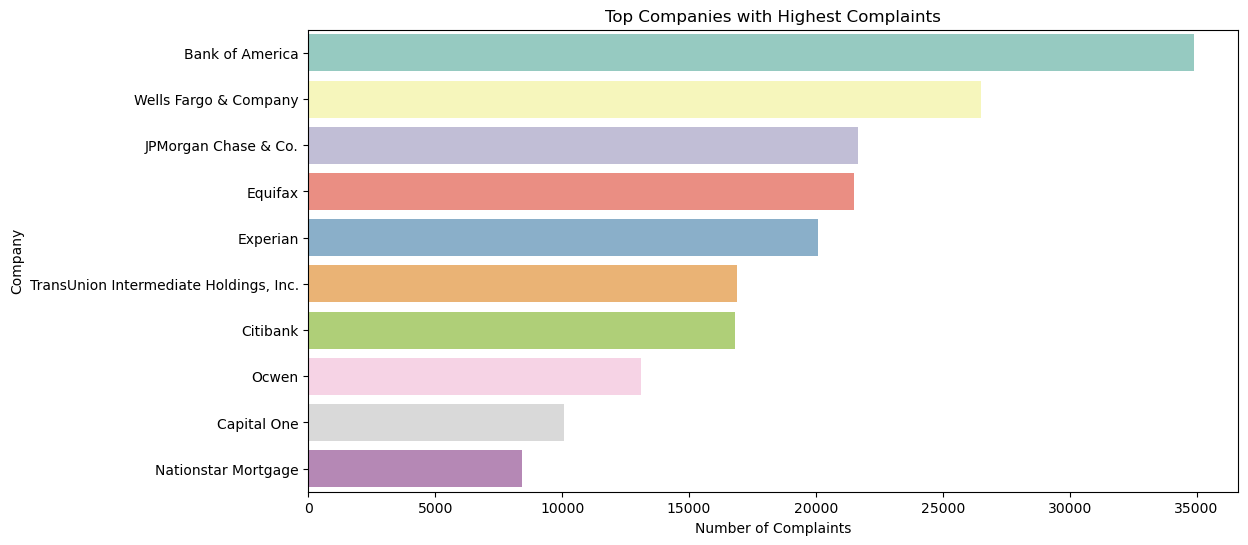

In [61]:
#: Bar graph of Top Companies with Highest Complaints:
top_companies = train_data['Company'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Set3')
plt.title("Top Companies with Highest Complaints")
plt.xlabel("Number of Complaints")
plt.ylabel("Company")
plt.show()


In [70]:
# Convert negative days held to zero
test_data['Date sent to company'] = test_data['Date sent to company'].apply(lambda x: max(0, x))

TypeError: '>' not supported between instances of 'str' and 'int'

In [66]:
# Drop unnecessary columns
train_data.drop(['Company', 'State', 'Year_received', 'Days_held'], axis=1, inplace=True)

In [142]:
# Change Consumer Disputed Column to 0 and 1 (yes to 1, and no to 0)
train_data['Consumer disputed?'] = train_data['Consumer disputed?'].map({'Yes': 1, 'No': 0})

In [143]:
# Create Dummy Variables for categorical features
train_data = pd.get_dummies(train_data, columns=['Product', 'Submitted via', 'Company response to consumer', 'Timely response?'])

In [62]:
# Extract features (X) and target variable (y)
X = train_data.drop(columns=['Consumer disputed?'])
y = train_data['Consumer disputed?']

# Identify and one-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Scale the data after one-hot encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)



In [63]:
# Make feature Selection with the help of PCA up to 80% of the information
from sklearn.decomposition import PCA
pca = PCA(0.8)
X = pca.fit_transform(X)

ValueError: could not convert string to float: 'Credit reporting'

In [ ]:
# Splitting the Data Sets Into X and Y
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# Build models and measure their test and validation accuracy
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = model.score(X_train, y_train)
    val_accuracy = model.score(X_val, y_val)
    print(f'{name} - Training Accuracy: {train_accuracy:.2f}, Validation Accuracy: {val_accuracy:.2f}')

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model


In [ ]:
# Use the best model to predict the outcome for the test file
test_data['Date received'] = pd.to_datetime(test_data['Date received'])
test_data['Date sent to company'] = pd.to_datetime(test_data['Date sent to company'])

# Extract Day, Month, and Year from Date Received Column
test_data['Day_received'] = test_data['Date received'].dt.day
test_data['Month_received'] = test_data['Date received'].dt.month
test_data['Year_received'] = test_data['Date received'].dt.year
test_data['Days_held'] = (test_data['Date sent to company'] - test_data['Date received']).dt.days
test_data['Week_received'] = test_data['Day_received'] // 7 + 1


In [147]:
# Save the output to a CSV file
test_data.to_csv('test_output.csv', index=False)